# Deep Q-Network (DQN)
---
This notebook is a implementation of a DQN agent to solve OpenAI Gym's LunarLander-v2 environment running on a Windows10 machine.

### 1. Import the Necessary Packages and set global variables

In [1]:
# global variables for control flow
watch_agent = True
save_graph = True
show_graph = True

!pip3 install gym
!pip3 install Box2D
!pip3 install pyglet==1.5.0
!pip install gym[box2d]
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


  Using cached https://files.pythonhosted.org/packages/98/c2/ab05b5329dc4416b5ee5530f0625a79c394a3e3c10abe0812b9345256451/box2d-py-2.3.8.tar.gz
  Running setup.py install for box2d-py: started
    Running setup.py install for box2d-py: finished with status 'error'
    Complete output from command C:\Dev\Python\RL\Lunar_Lander\venv\Scripts\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\JUSTIN~1\\AppData\\Local\\Temp\\pip-install-y5rse6nf\\box2d-py\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\JUSTIN~1\AppData\Local\Temp\pip-record-e7uluigx\install-record.txt --single-version-externally-managed --compile --install-headers C:\Dev\Python\RL\Lunar_Lander\venv\include\site\python3.6\box2d-py:
    Using setuptools (version 40.8.0).
    running install
    running build
    running build_py
    creating build
    creating build\lib.win-amd64-3.6
    creati

Command "C:\Dev\Python\RL\Lunar_Lander\venv\Scripts\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\JUSTIN~1\\AppData\\Local\\Temp\\pip-install-y5rse6nf\\box2d-py\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\JUSTIN~1\AppData\Local\Temp\pip-record-e7uluigx\install-record.txt --single-version-externally-managed --compile --install-headers C:\Dev\Python\RL\Lunar_Lander\venv\include\site\python3.6\box2d-py" failed with error code 1 in C:\Users\JUSTIN~1\AppData\Local\Temp\pip-install-y5rse6nf\box2d-py\


### 2. Instantiate the Environment and Untrained Agent

Initialize the environment in the code cell below.

In [2]:
# Set up Enviornment
env = gym.make('LunarLander-v2')
env.seed(88)

# Set up Agents
from dqn_agent import Agent, Agent_Double
baseline_agent = Agent(state_size=8, action_size=4, seed=88)
double_agent = Agent_Double(state_size=8, action_size=4, seed=88)


# Watch an untrained agent
state = env.reset()
if watch_agent:
    done = False
    while not done:
        env.render()
        action = baseline_agent.act(state)
        state, reward, done, _ = env.step(action)

    env.close()

c:\dev\python\rl\lunar_lander\venv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 3. Function to train the Baseline Agent with DQN

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = baseline_agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            baseline_agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    torch.save(baseline_agent.qnetwork_local.state_dict(), 'baseline_checkpoint.pth')
    return scores

### 4. Function to train the Double DQN Agent

In [4]:
def double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Double Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = double_agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            double_agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    torch.save(baseline_agent.qnetwork_local.state_dict(), 'double_checkpoint.pth')
    return scores

### 5. Train the Agents and view the results!

Episode 100	Average Score: -195.52
Episode 200	Average Score: -180.04
Episode 300	Average Score: 0.09096
Episode 400	Average Score: -98.92
Episode 500	Average Score: -10.370
Episode 600	Average Score: 20.35
Episode 700	Average Score: 149.20
Episode 800	Average Score: 6.8846
Episode 900	Average Score: 129.02
Episode 1000	Average Score: 180.04
Episode 1100	Average Score: 198.03
Episode 1200	Average Score: 203.03
Episode 1300	Average Score: 221.25
Episode 1400	Average Score: 202.76
Episode 1500	Average Score: 203.41
Episode 1600	Average Score: 217.15
Episode 1700	Average Score: 222.74
Episode 1800	Average Score: 235.39
Episode 1900	Average Score: 206.18
Episode 2000	Average Score: 230.36
Episode 100	Average Score: -183.88
Episode 200	Average Score: -212.04
Episode 300	Average Score: -110.18
Episode 400	Average Score: -37.895
Episode 500	Average Score: -2.652
Episode 600	Average Score: 27.29
Episode 700	Average Score: 152.79
Episode 800	Average Score: 161.44
Episode 900	Average Score: 198.

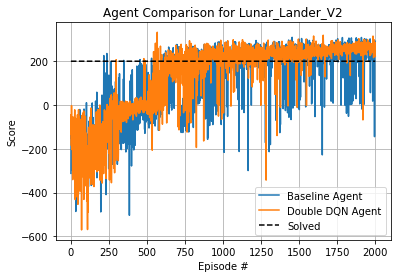

In [5]:
#Train the network and save the scores
baseline_scores = dqn()
double_scores = double_dqn()

# graph and show/save the scores
fig, ax = plt.subplots()
ax.set(xlabel="Episode #", ylabel='Score', title="Agent Comparison for Lunar_Lander_V2")
ax.grid()
ax.plot(np.arange(len(baseline_scores)), baseline_scores, label="Baseline Agent")
ax.plot(np.arange(len(double_scores)), double_scores, label="Double DQN Agent")
ax.plot(np.arange(len(baseline_scores)), np.ones(len(baseline_scores))*200, color='black', linestyle='dashed', label="Solved")
ax.set(xlabel="Episode #", ylabel='Score', title="Agent Comparison for Lunar_Lander_V2")
ax.legend()

if save_graph:
    filepath = f"C:\Dev\Python\RL\Lunar_Lander\images\\Model_Comparison.png"
    fig.savefig(filepath)
if show_graph:
    plt.show()

### 5. Watch a Smart Agent!

This code cell will load the trained weights from file to watch the smart agent!

In [11]:
if watch_agent:
    # load the weights from file
    baseline_agent.qnetwork_local.load_state_dict(torch.load('baseline_checkpoint.pth'))
    double_agent.qnetwork_local.load_state_dict(torch.load('double_checkpoint.pth'))

    for i in range(5):
        state = env.reset()
        done = False
        while not done:
            env.render()
            action = double_agent.act(state)
            state, reward, done, _ = env.step(action)

    env.close()